# Regresión Lineal

In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(seed=0)

In [4]:
D = lambda x: 0.9*x+0.08
t = np.linspace(-3,6,200)
TT = D(t)+np.random.rand(200)
fig = plt.figure(figsize=(7.2, 6.0))
plt.plot(t,TT)


per = np.random.randint(0,200,200)
nd = 50
X = t[per[:nd]]
y = TT[per[:nd]]
y = np.expand_dims(y,axis=1)

plt.plot(X,y,'or',markersize=4)

<IPython.core.display.Javascript object>

In [5]:
o = np.ones(nd)
X = X.reshape(nd)
X1 = np.stack((o,X),axis = 1)

inv = np.linalg.inv(np.matmul(X1.T,X1))
w = np.matmul(np.matmul(inv,X1.T,),y)

print(w)

[[0.57722881]
 [0.92668995]]


In [6]:
np.linalg.inv(X1.T@X1)@X1.T@y #Solo en python 3.5+ (en adelante)

array([[0.57722881],
       [0.92668995]])

In [7]:
G = np.stack((np.ones(200),t),axis = 1)

#w.shape
#G.shape
fig = plt.figure(figsize=(7.2, 6.0))
plt.plot(X,y,'or',markersize=4)
plt.plot(t,np.matmul(G,w))

<IPython.core.display.Javascript object>

## Regresión Lineal con Gradiente Descendiente

In [8]:
#Co = X1.T@X1
#val, _ = np.linalg.eig(Co)
#alfmax = 2/max(val)
#alfmax

In [9]:
alfa = 0.05
w = np.random.random_sample((X1.shape[1],1))
w_n = 3*w

i = 0
while np.abs(np.linalg.norm(w_n-w)) > 1e-5:
#while i < 1000:
    w_n = w.copy()
    for j in range(2):
        w[j] = w[j] - 1/nd*alfa*np.matmul((np.matmul(X1,w)-y).T,X1[:,j])
    #i+=1
    #print(np.linalg.norm(w_n-w))
w

array([[0.57750927],
       [0.92663835]])

## Ahora con Scikit-learn 

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
print(X.shape)
X = X.reshape(-1, 1)
print(X.shape)

(50,)
(50, 1)


In [12]:
clf = LinearRegression() #Se crea el clasificador
clf.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
print(clf.intercept_,clf.coef_)

[0.57722881] [[0.92668995]]


<IPython.core.display.Javascript object>


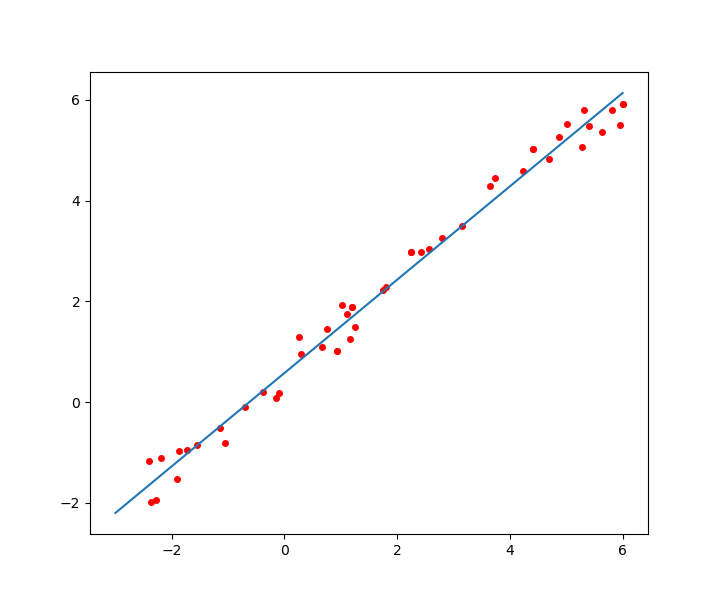

In [14]:
wn = np.array([clf.intercept_,clf.coef_])

G = np.stack((np.ones(200),t),axis = 1)
fig = plt.figure(figsize=(7.2, 6.0))
ax = fig.add_subplot(111)
ax.plot(X,y,'or',markersize=4)
ax.plot(t,np.dot(G,wn))

In [15]:
xp = -1
yp = clf.predict(xp)
ax.plot(xp,yp,'^g', markersize=13)

ValueError: Expected 2D array, got scalar array instead:
array=-1.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Regresión Polinomial

<IPython.core.display.Javascript object>


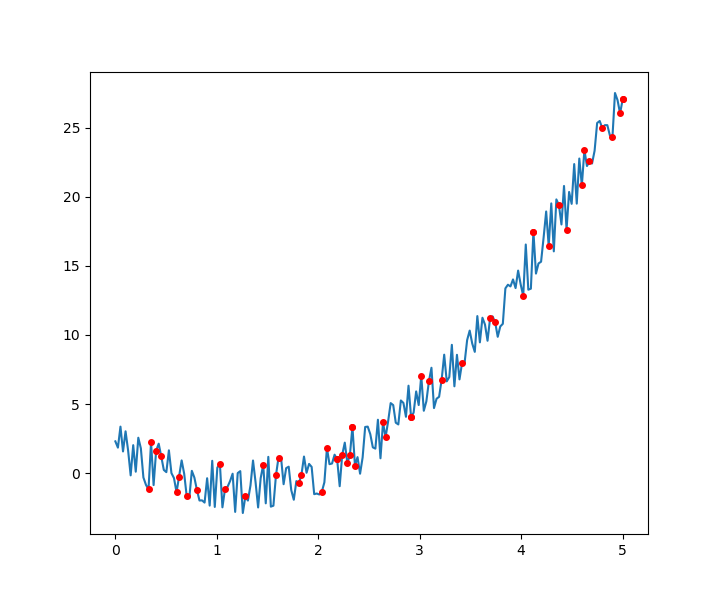

array([[ 1.94789657],
       [-4.55693085],
       [ 1.90991618]])

In [16]:
D2 = lambda x: 2*x**2 - 5*x + 0.2
t2 = np.linspace(0,5,200)
TT2 = D2(t2) + 4 * np.random.rand(200)

fig = plt.figure(figsize=(7.2, 6.0))
plt.plot(t2,TT2)

per2 = np.random.randint(0,200,200)
nd2 = 50
X2 = t2[per[:nd]]
y2 = TT2[per[:nd]]
y2 = np.expand_dims(y2,axis=1)


plt.plot(X2,y2,'or',markersize=4)


o = np.ones(nd)
X12 = np.stack((o,X2,X2**2),axis = 1)

w = np.linalg.inv(X12.T@X12)@X12.T@y2
w


<IPython.core.display.Javascript object>


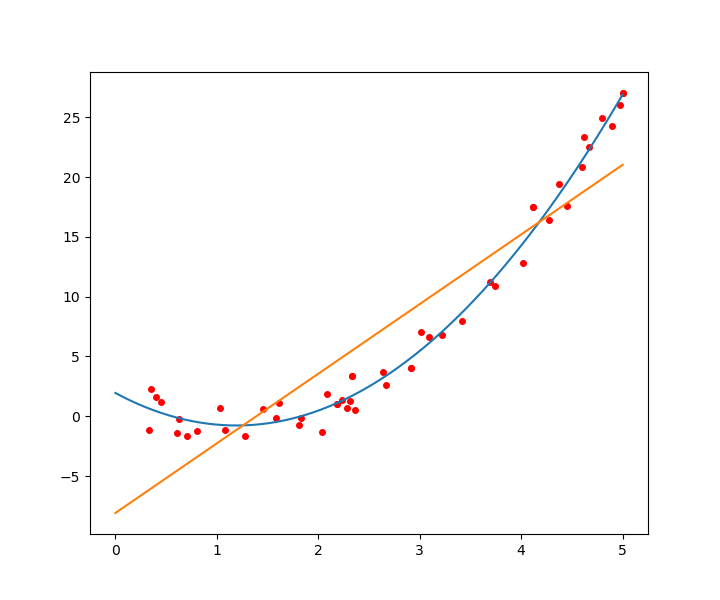

[[-8.09078132]
 [ 5.82477896]]


In [17]:
G2 = np.stack((np.ones(200),t2,t2**2),axis = 1)
G2L = np.stack((np.ones(200),t2),axis = 1)

fig = plt.figure(figsize=(7.2, 6.0))
plt.plot(X2,y2,'or',markersize=4)
plt.plot(t2,np.matmul(G2,w))

X1L = np.stack((o,X2),axis = 1)
wL = np.linalg.inv(X1L.T@X1L)@X1L.T@y2

print(wL)
plt.plot(t2,np.matmul(G2L,wL))



<IPython.core.display.Javascript object>


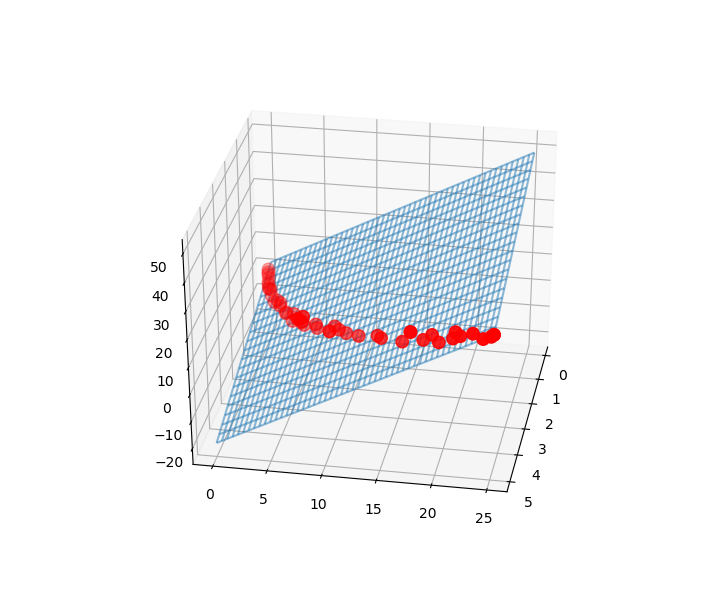

(500, 200)


In [18]:
fig = plt.figure(figsize=(7.2, 6.0))
ax = fig.add_subplot(111, projection='3d')

tt = np.linspace(0.0,25.0,500);
[XX, YY] = np.meshgrid(t2,tt);
Xe = XX.flatten()
Ye = YY.flatten()

XY = np.stack((np.ones(len(Xe)),Xe,Ye),axis = 1)
WW = XY@w;
print(XX.shape)
P1 = np.reshape(WW,XX.shape)
#P2 = np.zeros(XX.shape)
#for i in range(XX.shape[0]):
#    for j in range(XX.shape[1]):
#        P2[i,j] = [1,XX[i,j],YY[i,j]]@w
#        
#print(P2)


ax.scatter(X12[:,1],X12[:,2],y2,color='r',s=80)
ax.plot_wireframe(XX,YY,P1,rstride=10,cstride=10,alpha=0.5)


<IPython.core.display.Javascript object>


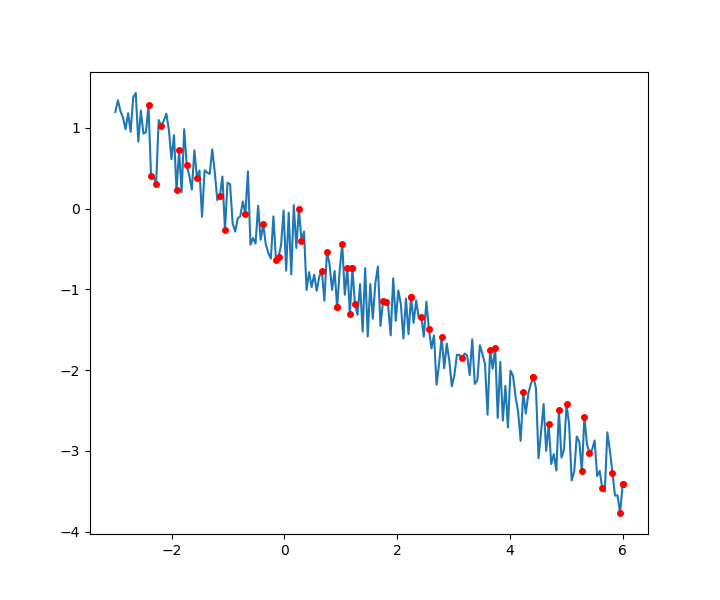

In [2]:
D = lambda x: -0.5*x-0.85
t = np.linspace(-3,6,200)
TT = D(t)+np.random.rand(200)
fig = plt.figure(figsize=(7.2, 6.0))
plt.plot(t,TT)


per = np.random.randint(0,200,200)
nd = 50
X = t[per[:nd]]
y = TT[per[:nd]]
y = np.expand_dims(y,axis=1)

plt.plot(X,y,'or',markersize=4)
np.savez('prueba', X=X,y=y)

In [10]:
import pickle

with open('prueba.pkl','wb') as f:
    pickle.dump([X,y],f)

[-0.7839196   1.5678392   1.61306533  0.3919598   2.29145729  5.32160804
  4.73366834  3.87437186  0.66331658 -2.05025126  3.60301508 -0.15075377
  1.02512563 -1.68844221 -1.32663317  5.00502513  4.59798995  1.79396985
  1.65829146 -2.50251256 -0.46733668  5.63819095  3.42211055 -1.55276382
  5.72864322  2.47236181  2.29145729 -0.06030151 -1.3718593  -1.86934673
  0.25628141 -0.73869347 -2.45728643  3.87437186  3.64824121  5.81909548
  3.24120603 -2.68341709  5.14070352  1.16080402 -2.36683417 -0.91959799
 -1.41708543  3.82914573 -0.24120603  2.29145729  5.18592965 -2.45728643
  4.8241206  -2.68341709]
